## Importing the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('../datasets/stock.csv')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749,3486.05


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1235 non-null   float64
 2   High                  1235 non-null   float64
 3   Low                   1235 non-null   float64
 4   Last                  1235 non-null   float64
 5   Close                 1235 non-null   float64
 6   Total Trade Quantity  1235 non-null   int64  
 7   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 77.3+ KB


In [4]:
df.shape

(1235, 8)

In [5]:
df.columns.values

array(['Date', 'Open', 'High', 'Low', 'Last', 'Close',
       'Total Trade Quantity', 'Turnover (Lacs)'], dtype=object)

In [6]:
df.corr()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Open,1.000000,0.998956,0.998776,0.997662,0.997704,0.367503,0.587026
High,0.998956,1.000000,0.998728,0.999130,0.999159,0.388798,0.605907
Low,0.998776,0.998728,1.000000,0.999008,0.999065,0.361695,0.582446
Last,0.997662,0.999130,0.999008,1.000000,0.999963,0.381269,0.599575
Close,0.997704,0.999159,0.999065,0.999963,1.000000,0.380801,0.599155
Total Trade Quantity,0.367503,0.388798,0.361695,0.381269,0.380801,1.000000,0.941976
Turnover (Lacs),0.587026,0.605907,0.582446,0.599575,0.599155,0.941976,1.000000


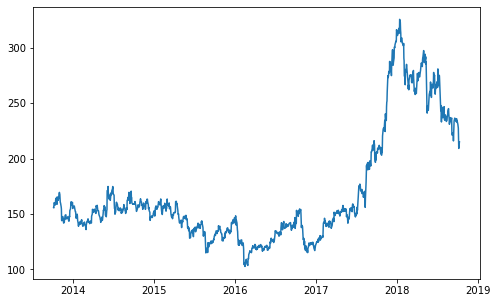

In [8]:
plt.figure(figsize=(8,5))
plt.plot(df['Close'],label='CloseHistory')
plt.show()

In [7]:
df['Date']= pd.to_datetime(df.Date, format= '%Y-%m-%d')
df.index = df['Date']
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2018-10-08,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146,10062.83
2018-10-05,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515,7407.06
2018-10-04,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786,3815.79
2018-10-03,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590,3960.27
2018-10-01,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749,3486.05


In [9]:
data= df.sort_index(ascending = True, axis = 0)
new_data = pd.DataFrame(index = range(0, len(df)), columns=['Date', 'Close'])
new_data.head()

,Date,Close
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [10]:
for i in range(0, len(data)):
  new_data['Date'][i] = data['Date'][i]
  new_data['Close'][i] = data['Close'][i]
new_data.head()

,Date,Close
0,2013-10-08 00:00:00,155.8
1,2013-10-09 00:00:00,155.55
2,2013-10-10 00:00:00,160.15
3,2013-10-11 00:00:00,160.05
4,2013-10-14 00:00:00,159.45


In [11]:
dataset = new_data.values
dataset.shape

(1235, 2)

In [12]:
from fastai.tabular.all import *
add_datepart(new_data, 'Date')
new_data.head()

,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,155.8,2013,10,41,8,1,281,False,False,False,False,False,False,1.381190e+09
1,155.55,2013,10,41,9,2,282,False,False,False,False,False,False,1.381277e+09
2,160.15,2013,10,41,10,3,283,False,False,False,False,False,False,1.381363e+09
3,160.05,2013,10,41,11,4,284,False,False,False,False,False,False,1.381450e+09
4,159.45,2013,10,42,14,0,287,False,False,False,False,False,False,1.381709e+09


In [13]:
new_data.drop('Elapsed', axis = 1, inplace = True)

In [14]:
new_data.head()

,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
0,155.8,2013,10,41,8,1,281,False,False,False,False,False,False
1,155.55,2013,10,41,9,2,282,False,False,False,False,False,False
2,160.15,2013,10,41,10,3,283,False,False,False,False,False,False
3,160.05,2013,10,41,11,4,284,False,False,False,False,False,False
4,159.45,2013,10,42,14,0,287,False,False,False,False,False,False


In [15]:
train = new_data[:987]
valid = new_data[987:]
x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

In [16]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 10, random_state = 0)
model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [17]:
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

105.61512721992739

In [18]:
valid.head()

,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
987,208.3,2017,10,41,9,0,282,False,False,False,False,False,False
988,208.45,2017,10,41,10,1,283,False,False,False,False,False,False
989,209.4,2017,10,41,11,2,284,False,False,False,False,False,False
990,212,2017,10,41,12,3,285,False,False,False,False,False,False
991,210.25,2017,10,41,13,4,286,False,False,False,False,False,False


In [21]:
x = preds
y = valid['Close']
y = np.array(y)

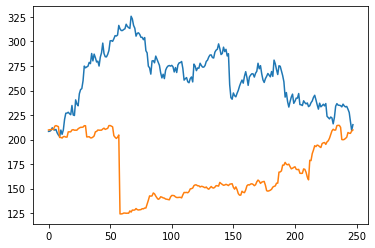

In [22]:
plt.plot(y)
plt.plot(x)